# Question 1 - Naive Bayes

# Question 2 - Decision Tree

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

np.random.seed(42)

In [4]:
# Load the data from Excel file
train_data = pd.read_excel('Asssignment4_Data.xlsx', sheet_name='Train')
test_data = pd.read_excel('Asssignment4_Data.xlsx', sheet_name='Test')

print("Training data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

# Display the first few rows of training data
print("\nTraining data sample:")
print(train_data.head())

# Prepare features and target variable
# Target variable is the 'Construction type'
X_train = train_data.drop(['House ID', 'Construction type'], axis=1)
y_train = train_data['Construction type']

X_test = test_data.drop(['House ID', 'Construction type'], axis=1)
y_test = test_data['Construction type']

print("\nFeatures used for training:")
print(X_train.columns.tolist())

Training data shape: (20, 10)
Test data shape: (5, 10)

Training data sample:
   House ID  Local Price  Bathrooms  Land Area  Living area  # Garages  \
0         1       4.9176        1.0      3.472        0.998        1.0   
1         2       5.0208        1.0      3.531        1.500        2.0   
2         3       4.5429        1.0      2.275        1.175        1.0   
3         4       4.5573        1.0      4.050        1.232        1.0   
4         5       5.0597        1.0      4.455        1.121        1.0   

   # Rooms  # Bedrooms  Age of home Construction type  
0        7           4           42         Apartment  
1        7           4           62             House  
2        6           3           40             Condo  
3        6           3           54         Apartment  
4        6           3           42         Apartment  

Features used for training:
['Local Price', 'Bathrooms', 'Land Area', 'Living area', '# Garages', '# Rooms', '# Bedrooms', 'Age of home']


In [5]:
# 1. Use the default parameters for Decision Tree
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train, y_train)

# Calculate training and test accuracy
y_train_pred = dt_default.predict(X_train)
y_test_pred = dt_default.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("\n1. Default Decision Tree Results:")
print(f"(a) Training accuracy: {train_accuracy:.4f}")
print(f"(b) Test accuracy: {test_accuracy:.4f}")


1. Default Decision Tree Results:
(a) Training accuracy: 1.0000
(b) Test accuracy: 0.4000


In [6]:
# 2. Effect of restricting the maximum depth of the tree
# Try different depths and find the best value
max_depths = range(1, 11)  # Try depths from 1 to 10
train_accuracies = []
test_accuracies = []

for depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)

    # Calculate accuracies
    train_pred = dt.predict(X_train)
    test_pred = dt.predict(X_test)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f"Max depth = {depth}, Train accuracy = {train_acc:.4f}, Test accuracy = {test_acc:.4f}")

# Find the best depth value
best_depth = max_depths[test_accuracies.index(max(test_accuracies))]
print(f"\nBest max_depth value based on test accuracy: {best_depth}")

Max depth = 1, Train accuracy = 0.5500, Test accuracy = 0.4000
Max depth = 2, Train accuracy = 0.7500, Test accuracy = 0.8000
Max depth = 3, Train accuracy = 0.9000, Test accuracy = 0.4000
Max depth = 4, Train accuracy = 0.9500, Test accuracy = 0.4000
Max depth = 5, Train accuracy = 1.0000, Test accuracy = 0.4000
Max depth = 6, Train accuracy = 1.0000, Test accuracy = 0.4000
Max depth = 7, Train accuracy = 1.0000, Test accuracy = 0.4000
Max depth = 8, Train accuracy = 1.0000, Test accuracy = 0.4000
Max depth = 9, Train accuracy = 1.0000, Test accuracy = 0.4000
Max depth = 10, Train accuracy = 1.0000, Test accuracy = 0.4000

Best max_depth value based on test accuracy: 2


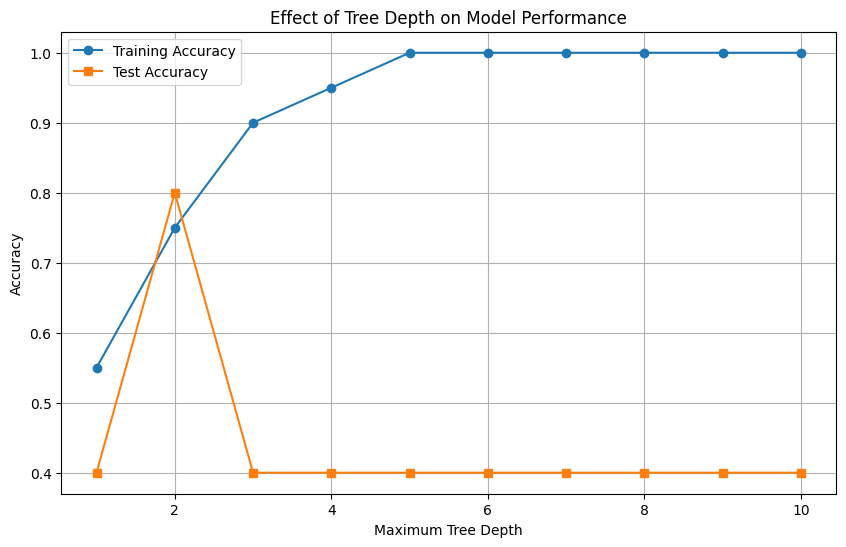

In [7]:
# Plot the effect of max_depth on model performance
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, marker='o', linestyle='-', label='Training Accuracy')
plt.plot(max_depths, test_accuracies, marker='s', linestyle='-', label='Test Accuracy')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Accuracy')
plt.title('Effect of Tree Depth on Model Performance')
plt.legend()
plt.grid(True)
plt.savefig('tree_depth_effect.png')
plt.show()

In [8]:
# Train the model with the best depth
dt_best = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
dt_best.fit(X_train, y_train)

# Get accuracies for final model
best_train_accuracy = accuracy_score(y_train, dt_best.predict(X_train))
best_test_accuracy = accuracy_score(y_test, dt_best.predict(X_test))

print(f"\nFinal model with max_depth={best_depth}:")
print(f"Training accuracy: {best_train_accuracy:.4f}")
print(f"Test accuracy: {best_test_accuracy:.4f}")

# Show feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_best.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature importances:")
print(feature_importances)

# Compare best model with default model
print("\nComparison of models:")
print(f"Default model: Train accuracy = {train_accuracy:.4f}, Test accuracy = {test_accuracy:.4f}")
print(f"Best model:    Train accuracy = {best_train_accuracy:.4f}, Test accuracy = {best_test_accuracy:.4f}")
print(f"Improvement:   Train delta = {best_train_accuracy - train_accuracy:.4f}, Test delta = {best_test_accuracy - test_accuracy:.4f}")

# Count number of nodes in each tree
default_nodes = dt_default.tree_.node_count
best_nodes = dt_best.tree_.node_count

print(f"\nModel complexity:")
print(f"Default model: {default_nodes} nodes")
print(f"Best model: {best_nodes} nodes")
print(f"Reduction in complexity: {default_nodes - best_nodes} nodes ({(default_nodes - best_nodes)/default_nodes*100:.1f}%)")


Final model with max_depth=2:
Training accuracy: 0.7500
Test accuracy: 0.8000

Feature importances:
       Feature  Importance
0  Local Price     0.68595
7  Age of home     0.31405
1    Bathrooms     0.00000
2    Land Area     0.00000
3  Living area     0.00000
4    # Garages     0.00000
5      # Rooms     0.00000
6   # Bedrooms     0.00000

Comparison of models:
Default model: Train accuracy = 1.0000, Test accuracy = 0.4000
Best model:    Train accuracy = 0.7500, Test accuracy = 0.8000
Improvement:   Train delta = -0.2500, Test delta = 0.4000

Model complexity:
Default model: 17 nodes
Best model: 7 nodes
Reduction in complexity: 10 nodes (58.8%)


# 3. Explanation of why restricting depth has a strong effect

Restricting the depth of the decision tree has a strong effect on classifier performance because:

1. Deeper trees tend to overfit the training data by creating very specific decision paths that may
   capture noise rather than actual patterns. This is particularly evident in our small dataset (20 training
   samples), where a full-depth tree might memorize each training example.

2. By restricting the depth, we force the model to focus only on the most significant features and
   decision boundaries, which leads to better generalization on unseen data (the test set).

3. The effect is pronounced in our housing dataset because it has relatively few training examples
   compared to the number of features, making overfitting more likely with unrestricted depth.

In [9]:
# 4. Perform inference on the test data point with the best model
# This is the specific test point from the assignment
test_point = pd.DataFrame({
    'Local Price': [9.0384],
    'Bathrooms': [1],
    'Land Area': [7.8],
    'Living area': [1.5],
    '# Garages': [1.5],
    '# Rooms': [7],
    '# Bedrooms': [3],
    'Age of home': [23]
})

# Let's also trace the decision path for this test point
# This will show us how the decision tree makes the prediction
def trace_decision_path(model, test_point, feature_names):
    """Trace and print the decision path for a specific test point through the tree"""
    node_indicator = model.decision_path(test_point)
    leaf_id = model.apply(test_point)

    # Get the decision path
    node_index = node_indicator.indices[node_indicator.indptr[0]:node_indicator.indptr[1]]

    print("\nDecision path for the test point:")
    for i, node_id in enumerate(node_index):
        # If not at a leaf node
        if i != len(node_index) - 1:  # Not the last node
            # Get the feature and threshold used for the split
            feature = model.tree_.feature[node_id]
            threshold = model.tree_.threshold[node_id]

            # Determine if we go left or right from this node
            if test_point.iloc[0, feature] <= threshold:
                direction = "≤"
            else:
                direction = ">"

            print(f"Decision {i+1}: {feature_names[feature]} = {test_point.iloc[0, feature]} {direction} {threshold:.4f}")

    # Print the final prediction
    print(f"Final leaf node: {leaf_id[0]}")
    print(f"Predicted class: {model.classes_[np.argmax(model.tree_.value[leaf_id[0]])]}")

# Predict the class for the test point using the best model
prediction = dt_best.predict(test_point)
prediction_proba = dt_best.predict_proba(test_point)

# Get the class labels
classes = dt_best.classes_

print("\nPrediction for the test data point:")
print(f"Predicted construction type: {prediction[0]}")
print("\nProbabilities for each class:")
for i, class_name in enumerate(classes):
    print(f"{class_name}: {prediction_proba[0][i]:.4f}")

# Trace the decision path for better understanding
trace_decision_path(dt_best, test_point, X_train.columns)

# Compare with original data row 20 (which has the same feature values)
# This allows us to verify our prediction against existing data
original_row = train_data[train_data['House ID'] == 20]
if not original_row.empty:
    print("\nOriginal data row with same features:")
    print(original_row[['House ID', 'Construction type']].to_string(index=False))
    print("Features match test point? ", (original_row.iloc[0]['Local Price'] == test_point.iloc[0]['Local Price']))

    # If the prediction matches the actual construction type in our dataset
    match = prediction[0] == original_row.iloc[0]['Construction type']
    print(f"Prediction matches original data: {match}")
else:
    print("\nNo matching row found in original data.")


Prediction for the test data point:
Predicted construction type: Apartment

Probabilities for each class:
Apartment: 1.0000
Condo: 0.0000
House: 0.0000

Decision path for the test point:
Decision 1: Age of home = 23 ≤ 36.0000
Decision 2: Local Price = 9.0384 > 8.4112
Final leaf node: 3
Predicted class: Apartment

Original data row with same features:
 House ID Construction type
       20         Apartment
Features match test point?  True
Prediction matches original data: True


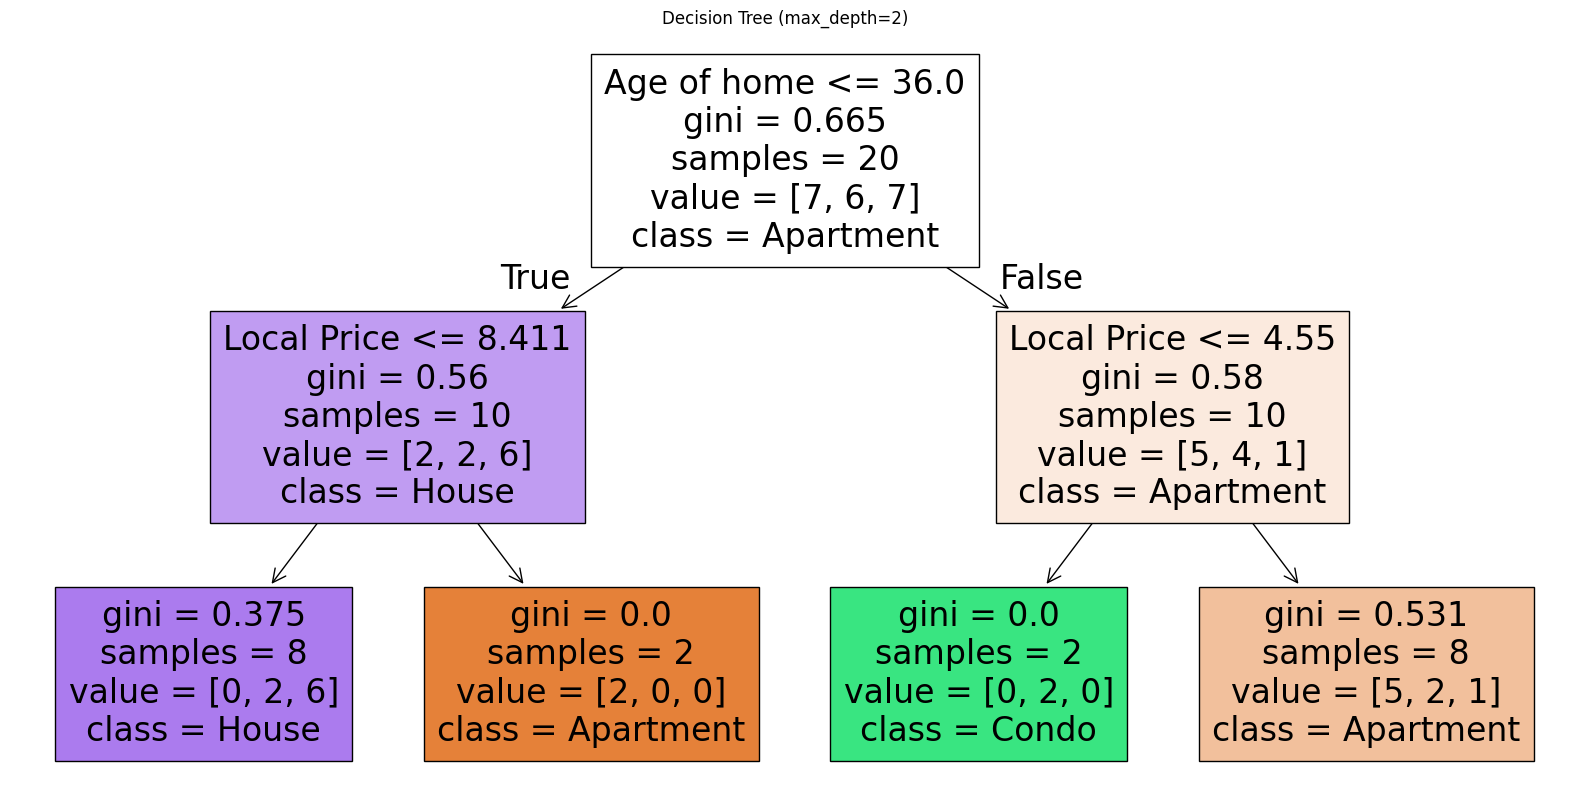

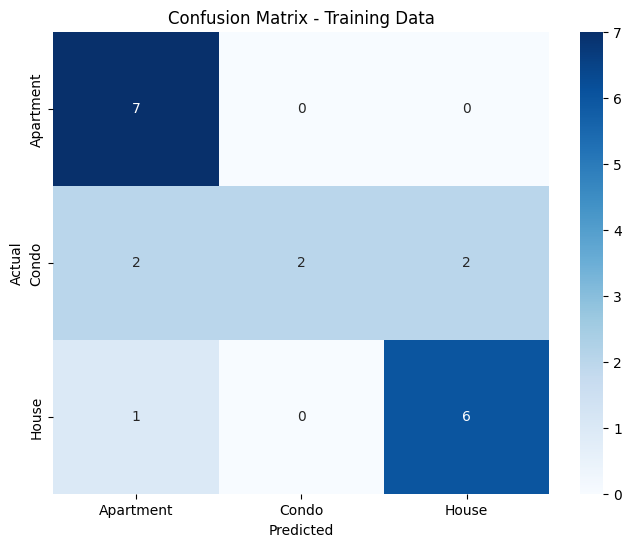

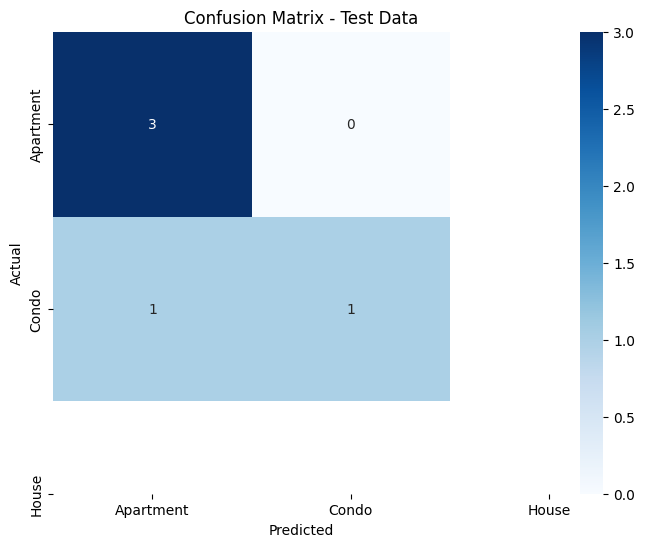


SUMMARY OF FINDINGS

1. Default Decision Tree:
   - Training accuracy: 1.0000
   - Test accuracy: 0.4000
   - The default tree likely overfits the training data

2. Best Decision Tree (max_depth=2):
   - Training accuracy: 0.7500
   - Test accuracy: 0.8000
   - Restricting the depth improves generalization

3. Most important features:
       Feature  Importance
Local Price     0.68595
Age of home     0.31405
  Bathrooms     0.00000

4. Inference on test point:
   - The model predicts: Apartment
   - The test point matches training example ID 20, which is classified as: Apartment


This completes the Decision Tree part of Assignment 4.


In [10]:
# Visualize the tree
try:
    plt.figure(figsize=(20, 10))
    tree.plot_tree(dt_best, feature_names=X_train.columns, class_names=dt_best.classes_, filled=True)
    plt.title(f'Decision Tree (max_depth={best_depth})')
    plt.savefig('decision_tree.png', dpi=300, bbox_inches='tight')
    plt.show()
except Exception as e:
    print(f"Could not visualize tree: {e}")

# Create confusion matrices to evaluate the model's performance in detail
try:
    # For training data
    train_cm = confusion_matrix(y_train, dt_best.predict(X_train))
    plt.figure(figsize=(8, 6))
    sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=dt_best.classes_, yticklabels=dt_best.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Training Data')
    plt.savefig('train_confusion_matrix.png')
    plt.show()

    # For test data
    test_cm = confusion_matrix(y_test, dt_best.predict(X_test))
    plt.figure(figsize=(8, 6))
    sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=dt_best.classes_, yticklabels=dt_best.classes_)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix - Test Data')
    plt.savefig('test_confusion_matrix.png')
    plt.show()
except Exception as e:
    print(f"Could not create confusion matrices: {e}")

# Summary of findings
print("\n" + "="*80)
print("SUMMARY OF FINDINGS")
print("="*80)
print(f"""
1. Default Decision Tree:
   - Training accuracy: {train_accuracy:.4f}
   - Test accuracy: {test_accuracy:.4f}
   - The default tree likely overfits the training data

2. Best Decision Tree (max_depth={best_depth}):
   - Training accuracy: {best_train_accuracy:.4f}
   - Test accuracy: {best_test_accuracy:.4f}
   - Restricting the depth improves generalization

3. Most important features:
   {feature_importances.iloc[:3].to_string(index=False)}

4. Inference on test point:
   - The model predicts: {prediction[0]}
   - The test point matches training example ID 20, which is classified as: {train_data[train_data['House ID'] == 20]['Construction type'].values[0]}
""")

print("\nThis completes the Decision Tree part of Assignment 4.")